In [1]:
#
# Árvore de Decisão - dataset: Black-Friday
# author: Irving Lucas (irving.lucas@gmail.com)
# OBS:
# coloque o dataset no diretório raiz desse código e modifique o nome do arquivo xlsx na linha 9
# manter apenas os imports necessários para essa parte do código
#

import os
import time as t
import pandas as pd

diretorio_dataset = os.getcwd()
diretorio_dataset +=r"\black-friday.xlsx"
print("Diretorio do data-set: " + diretorio_dataset)
inicio = t.time()
data_frame = pd.read_excel(diretorio_dataset)
fim = t.time()
tempo = fim-inicio
print("dataset carregado em: %.2f minutos" %(tempo/60))

Diretorio do data-set: C:\Users\irvin\Projetos\machine-learning\DECISION TREE\black-friday.xlsx
dataset carregado em: 2.20 minutos


In [2]:
len(data_frame.User_ID.unique())

5891

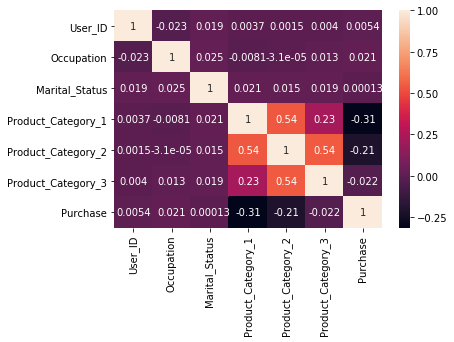

In [32]:
import seaborn as sns
sns.heatmap(data_frame.corr(), annot=True)

In [33]:
#dataframe_treino=frame com informações necessarias para treino // dataset_classes=conjunto de classes que queremos prever

dataframe_treino = data_frame[['User_ID','Age','Gender','Occupation','City_Category','Marital_Status']]
#dataframe_classes = data_frame['Age']

#dataframe_treino.head()

#dataframe_treino.drop_duplicates()

In [34]:
dataframe_treino.head(3)

,User_ID,Age,Gender,Occupation,City_Category,Marital_Status
0,1000001,0-17,F,10,A,0
1,1000001,0-17,F,10,A,0
2,1000001,0-17,F,10,A,0


In [35]:
#dataframe_treino.sort_values(by=['User_ID'])

In [36]:
dataframe_treino = dataframe_treino.drop_duplicates(subset='User_ID', keep='first') #melhor biblioteca da vida
#dividir o dataset de treino e classes para separar uma parte para treinar de fato e outra para testar

In [37]:
dataframe_treino['User_ID'].count()

5891

In [38]:
dataframe_treino.head(3)

,User_ID,Age,Gender,Occupation,City_Category,Marital_Status
0,1000001,0-17,F,10,A,0
4,1000002,55+,M,16,C,0
5,1000003,26-35,M,15,A,0


In [39]:
#Coleta apenas a coluna de idade
dataframe_classes = dataframe_treino['Age']
dataframe_classes.unique()

#muda o dtype do objeto
#dataframe_classes = dataframe_classes.astype('category') 

#muda a representação de intervalos de idade para um código. Ex: "0-17" -> 0
#dataframe_classes = dataframe_classes.cat.codes

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [40]:
#dataframe_treino
#dataframe_classes.unique()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
#dividir o dataset de treino e classes para separar uma parte para treinar de fato e outra para testar
x_train, x_test, y_train, y_test = train_test_split(dataframe_treino, dataframe_classes)

In [43]:
x_train.head(5)

,User_ID,Age,Gender,Occupation,City_Category,Marital_Status
16654,1002581,26-35,M,11,A,0
16919,1002641,26-35,M,6,C,1
12396,1001876,26-35,M,12,C,0
34418,1005316,18-25,M,4,A,0
45812,1001070,46-50,F,2,B,1


In [44]:
#
# ['18-25', '0-17', '55+', '26-35', '46-50', '36-45', '51-55']
#executar essa célula apenas uma vez
#

#fazer verificação dos valores, aparentemente se um dos intervalos não existir no x_train, ele não executa a célula inteira

x_train.loc[x_train.Age=='0-17','Age'] = 0
x_train.loc[x_train.Age=='18-25','Age'] = 1
x_train.loc[x_train.Age=='26-35','Age'] = 2
x_train.loc[x_train.Age=='36-45','Age'] = 3
x_train.loc[x_train.Age=='46-50','Age'] = 4
x_train.loc[x_train.Age=='51-55','Age'] = 5
x_train.loc[x_train.Age=='55+','Age'] = 6

x_train.loc[x_train.Gender=='F', 'Gender'] = 0
x_train.loc[x_train.Gender=='M', 'Gender'] = 1

x_train.loc[x_train.City_Category=='A','City_Category'] = 0
x_train.loc[x_train.City_Category=='B','City_Category'] = 1
x_train.loc[x_train.City_Category=='C','City_Category'] = 2

In [45]:
x_train.head(10)

,User_ID,Age,Gender,Occupation,City_Category,Marital_Status
16654,1002581,2,1,11,0,0
16919,1002641,2,1,6,2,1
12396,1001876,2,1,12,2,0
34418,1005316,1,1,4,0,0
45812,1001070,4,0,2,1,1
87415,1001471,2,1,17,1,0
19178,1003022,2,1,17,2,0
6716,1001081,1,1,4,2,1
33690,1005170,1,1,4,1,0
13368,1001996,3,1,0,2,0


In [46]:
y_train = y_train.astype('category')
y_train = y_train.cat.codes

In [47]:
y_train.head(10)

16654    2
16919    2
12396    2
34418    1
45812    4
87415    2
19178    2
6716     1
33690    1
13368    3
dtype: int8

In [48]:
x_test.head(5)

,User_ID,Age,Gender,Occupation,City_Category,Marital_Status
4438,1000728,26-35,M,6,C,0
33879,1005212,18-25,M,2,B,0
13427,1002008,26-35,M,3,C,0
21766,1003427,26-35,M,14,C,0
1807,1000295,18-25,M,0,C,0


In [49]:
x_test.loc[x_test.Age=='0-17','Age'] = 0
x_test.loc[x_test.Age=='18-25','Age'] = 1
x_test.loc[x_test.Age=='26-35','Age'] = 2
x_test.loc[x_test.Age=='36-45','Age'] = 3
x_test.loc[x_test.Age=='46-50','Age'] = 4
x_test.loc[x_test.Age=='51-55','Age'] = 5
x_test.loc[x_test.Age=='55+','Age'] = 6

x_test.loc[x_test.Gender=='F', 'Gender'] = 0
x_test.loc[x_test.Gender=='M', 'Gender'] = 1

x_test.loc[x_test.City_Category=='A','City_Category'] = 0
x_test.loc[x_test.City_Category=='B','City_Category'] = 1
x_test.loc[x_test.City_Category=='C','City_Category'] = 2

In [50]:
x_test.head(5)

,User_ID,Age,Gender,Occupation,City_Category,Marital_Status
4438,1000728,2,1,6,2,0
33879,1005212,1,1,2,1,0
13427,1002008,2,1,3,2,0
21766,1003427,2,1,14,2,0
1807,1000295,1,1,0,2,0


In [51]:
y_test.head(5)

4438     26-35
33879    18-25
13427    26-35
21766    26-35
1807     18-25
Name: Age, dtype: object

In [52]:
y_test = y_test.astype('category')
y_test = y_test.cat.codes

In [53]:
y_test.head(5)

4438     2
33879    1
13427    2
21766    2
1807     1
dtype: int8

In [54]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=0, criterion='entropy')
clf.fit(X=x_train,y=y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [55]:
print("acurácia no treino: {:.3f}".format(clf.score(x_train,y_train)))
print("acurácia no teste: {:.3f}".format(clf.score(x_test,y_test)))

acurácia no treino: 0.824
acurácia no teste: 0.802


In [56]:
import graphviz
from sklearn import tree
dados = tree.export_graphviz(clf, out_file=None)
grafo = graphviz.Source(dados)

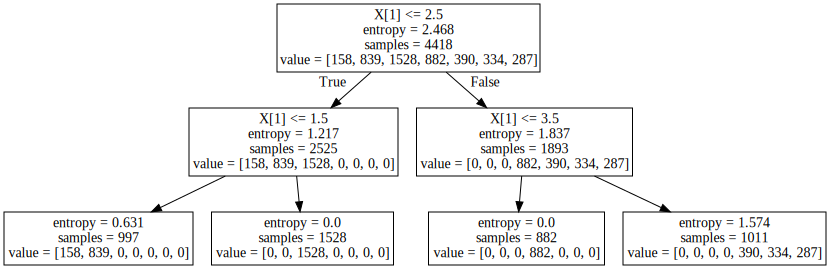

In [57]:
grafo